In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting up the dataframe
trips = pd.read_csv(r"C:\Cellula\task 4\final_internship_data.csv")
trips.columns = trips.columns.str.replace(' ', '_')
trips.columns = trips.columns.str.lower()
trips['pickup_datetime']= pd.to_datetime(trips['pickup_datetime'])
print('number of duplicates:', sum(trips.duplicated(subset= 'user_id')))
print('number of duplicated trip keys:', sum(trips.duplicated(subset= 'key')))
trips.isnull().sum()
feat_with_null = trips.columns[trips.isnull().sum()>0].to_list()
feat_with_null
#could be interpreted as accidents or loss of internet connection

number of duplicates: 0
number of duplicated trip keys: 0


['dropoff_longitude',
 'dropoff_latitude',
 'jfk_dist',
 'ewr_dist',
 'lga_dist',
 'sol_dist',
 'nyc_dist',
 'distance',
 'bearing']

In [3]:
null_indicies= trips[trips.isnull().any(axis= 1)].index.values.tolist()
trips.drop(null_indicies, inplace= True)
trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499995 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_id            499995 non-null  object        
 1   user_name          499995 non-null  object        
 2   driver_name        499995 non-null  object        
 3   car_condition      499995 non-null  object        
 4   weather            499995 non-null  object        
 5   traffic_condition  499995 non-null  object        
 6   key                499995 non-null  object        
 7   fare_amount        499995 non-null  float64       
 8   pickup_datetime    499995 non-null  datetime64[ns]
 9   pickup_longitude   499995 non-null  float64       
 10  pickup_latitude    499995 non-null  float64       
 11  dropoff_longitude  499995 non-null  float64       
 12  dropoff_latitude   499995 non-null  float64       
 13  passenger_count    499995 non-null  int64        

In [4]:
#creating a dummy variable for trips that started outside of New York City
#the number 57 was chosen because it is the distance from northeast to southwest in New York City
jfk_out = trips[trips['jfk_dist']>57]['user_id'].to_list()
ewr_out = trips[trips['ewr_dist']>57]['user_id'].to_list()
lga_out = trips[trips['lga_dist']>57]['user_id'].to_list()
sol_out = trips[trips['sol_dist']>57]['user_id'].to_list()
nyc_out = trips[trips['nyc_dist']>57]['user_id'].to_list()
start_out_nyc= list(set(jfk_out + ewr_out + lga_out + sol_out + nyc_out))
trips['start_out_nyc'] = trips['user_id'].isin(start_out_nyc).astype(int)

In [5]:
#creating a dummy variable for cancelled trips
trips['cancelled'] = (trips['distance'] == 0).astype(int)

In [6]:
#dropping rows with fare amounts less than zero  
trips.drop(index= trips[trips['fare_amount'] < 0].index, inplace= True)

#dropping rows with passenger count equal to zero
trips.drop(index= trips[trips['passenger_count'] == 0].index, inplace= True)

#dropping rows with illogical distances
for feature in ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance']:
    error = trips[trips[feature] > 1000].index
    trips.drop(index= error, inplace= True)

#dropping rows with a fare amount bigger than 100 and started in New York City
error = trips.loc[(trips['start_out_nyc'] == 0) & (trips['fare_amount'] > 100)]
trips.drop(index= error.index, inplace= True)

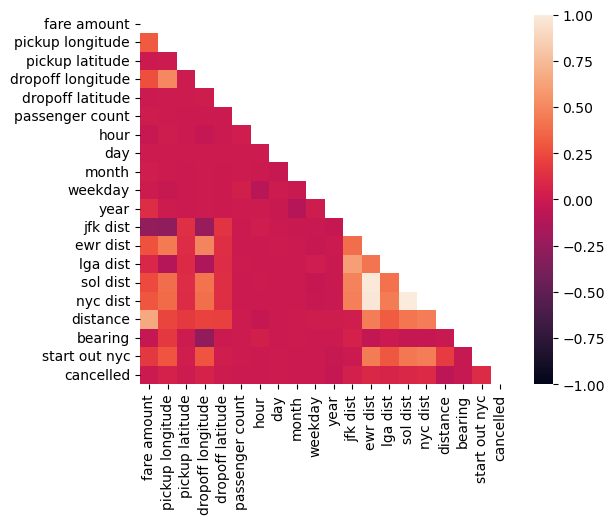

In [7]:
#correlation heatmap for numerical categories
num_cat= trips.select_dtypes(include=['number'])
num_cat.columns = num_cat.columns.str.replace('_', ' ')
num_cat_heatmap = num_cat
sns.heatmap(num_cat_heatmap.corr(), vmin= -1, vmax= 1,square= True, mask= np.triu(np.ones_like(num_cat_heatmap.corr(), dtype= 'bool')))
plt.show()

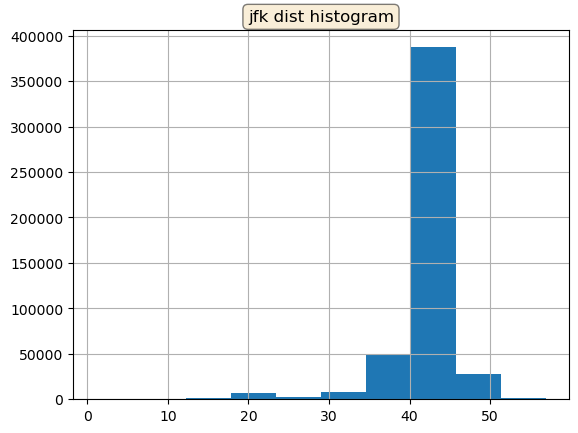

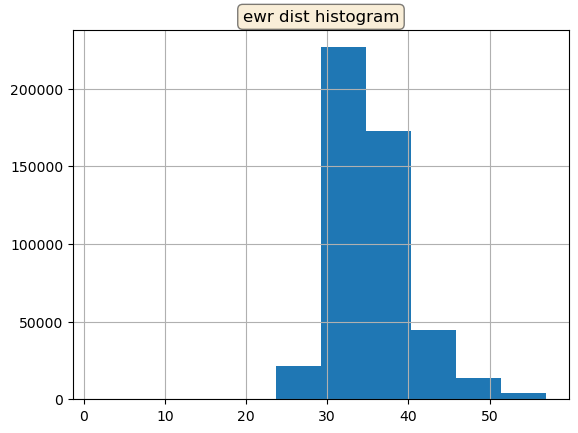

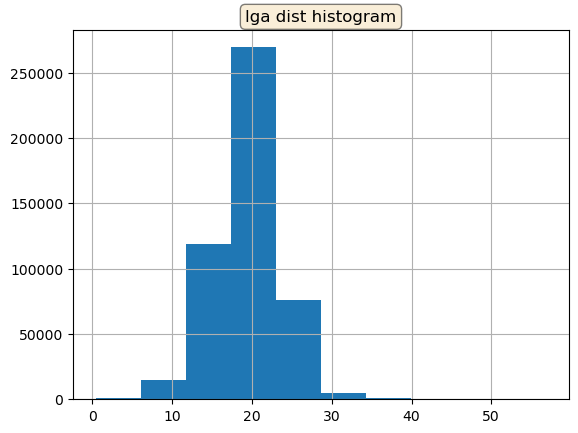

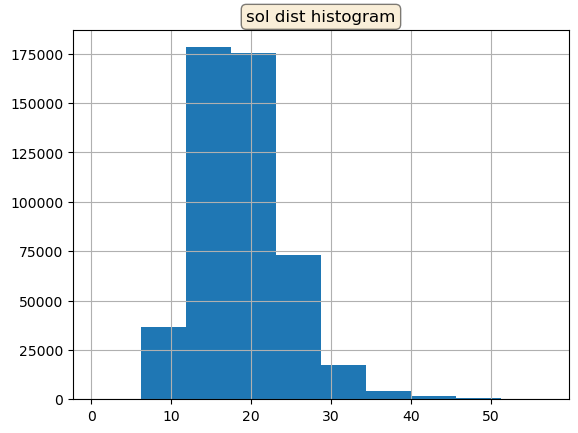

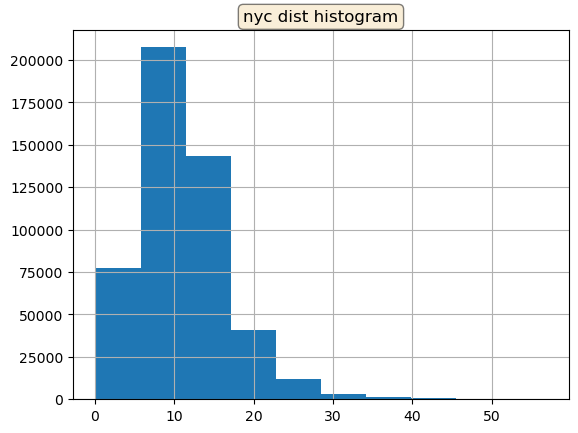

In [8]:

#it is considered that any trip starting within a 57 km radius from an airport is started in New York City
trips[trips['jfk_dist']<57]['jfk_dist'].hist()
plt.title('jfk dist histogram', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

trips[trips['ewr_dist']<57]['ewr_dist'].hist()
plt.title('ewr dist histogram', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

trips[trips['lga_dist']<57]['lga_dist'].hist()
plt.title('lga dist histogram', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

trips[trips['sol_dist']<57]['sol_dist'].hist()
plt.title('sol dist histogram', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

trips[trips['nyc_dist']<57]['nyc_dist'].hist()
plt.title('nyc dist histogram', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

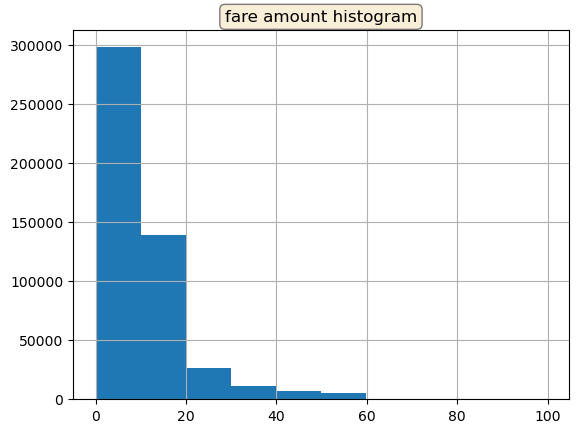

In [9]:
#fare amount histogram for less than 100
trips[trips['fare_amount'] < 100]['fare_amount'].hist()
plt.title('fare amount histogram', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
plt.show()

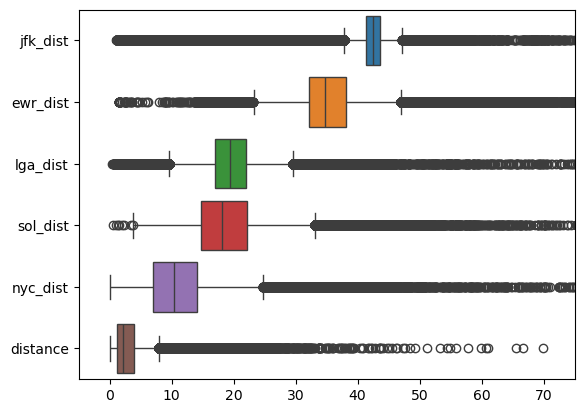

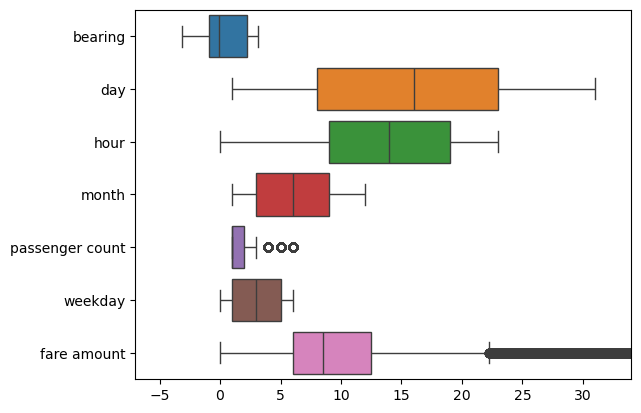

In [10]:
#box plots
sns.boxplot(data= trips[['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance']], orient= 'h')
plt.xlim(-5,75)
plt.show()

sns.boxplot(data= num_cat[['bearing', 'day', 'hour', 'month', 'passenger count', 'weekday', 'fare amount']], orient= 'h')
plt.xlim(-7,34)
plt.show()

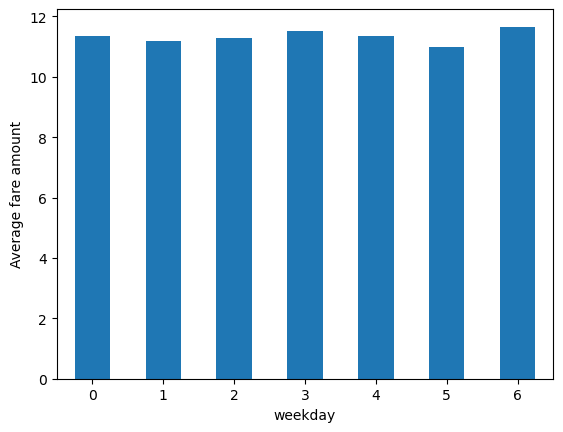

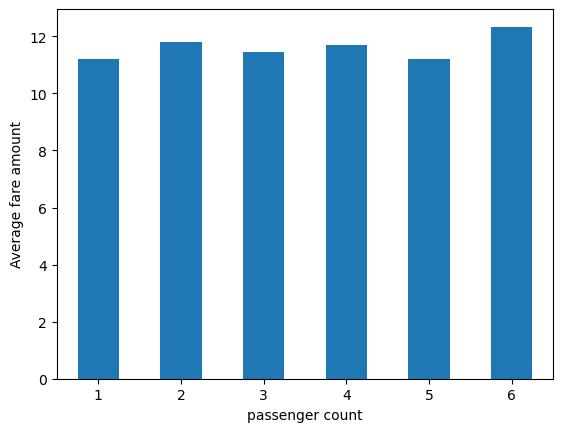

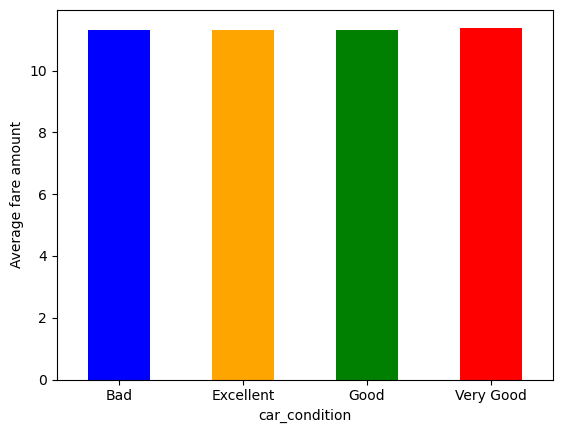

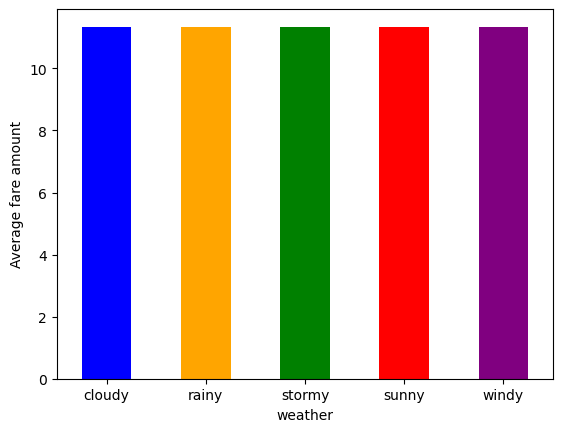

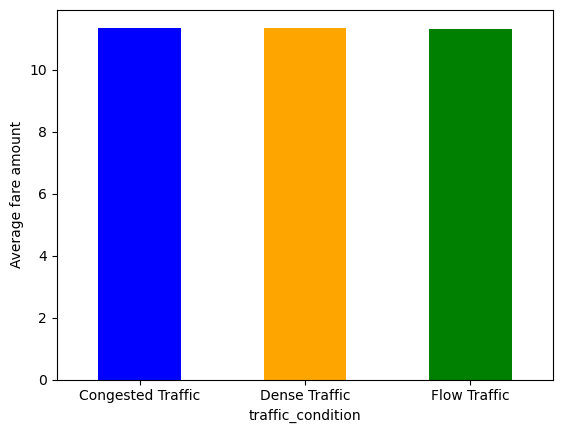

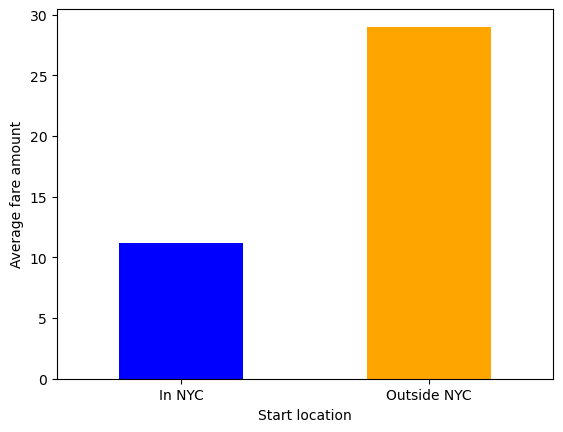

In [11]:
#bar plots for categorigal features vs. fare amount
trips.groupby('weekday')['fare_amount'].mean().plot.bar(rot=0).set(ylabel= 'Average fare amount')
plt.show()

num_cat.groupby('passenger count')['fare amount'].mean().plot.bar(rot=0).set(ylabel= 'Average fare amount')
plt.show()

trips.groupby('car_condition')['fare_amount'].mean().plot.bar(rot=0, color = ['blue', 'orange', 'green', 'red']).set(ylabel= 'Average fare amount')
plt.show()

trips.groupby('weather')['fare_amount'].mean().plot.bar(rot=0, color = ['blue', 'orange', 'green', 'red', 'purple']).set(ylabel= 'Average fare amount')
plt.show()

trips.groupby('traffic_condition')['fare_amount'].mean().plot.bar(rot=0, color = ['blue', 'orange', 'green']).set(ylabel= 'Average fare amount')
plt.show()

trips.groupby('start_out_nyc')['fare_amount'].mean().plot.bar(rot=0, color = ['blue', 'orange']).set(ylabel= 'Average fare amount', xlabel= 'Start location' ,xticklabels= ['In NYC', 'Outside NYC'])
plt.show()

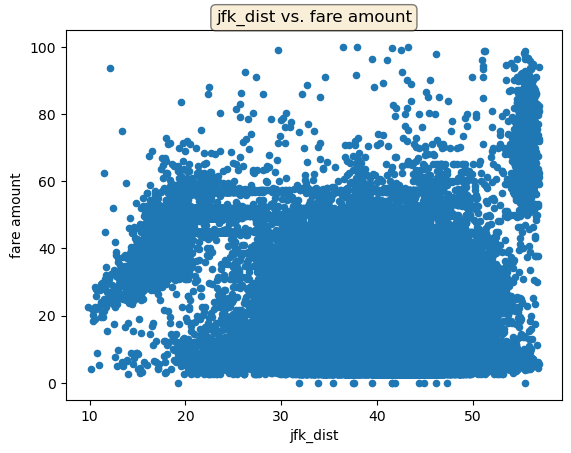

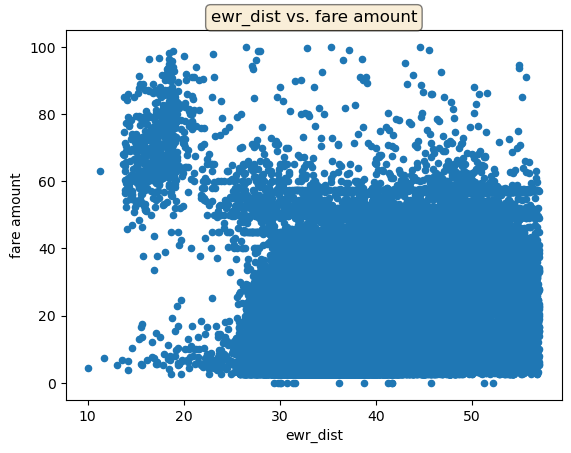

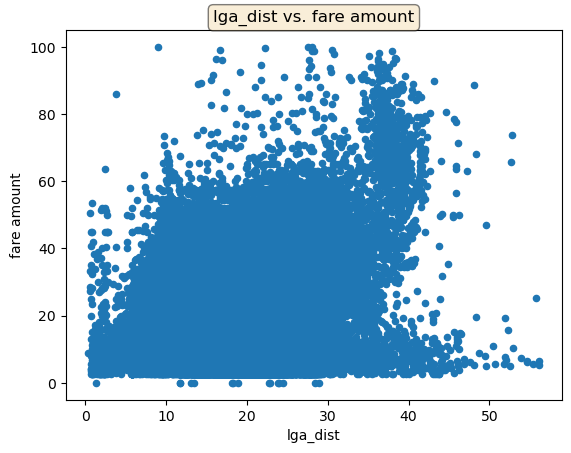

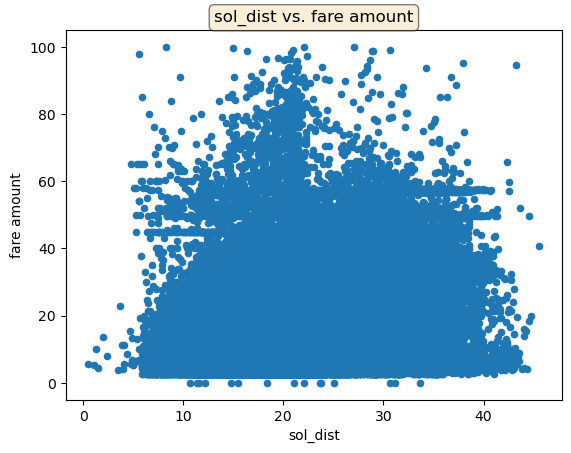

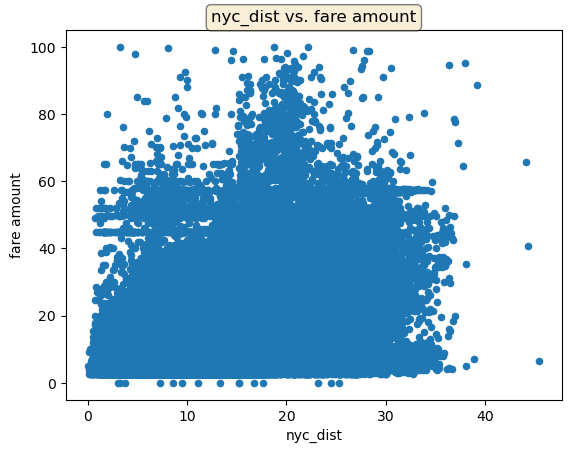

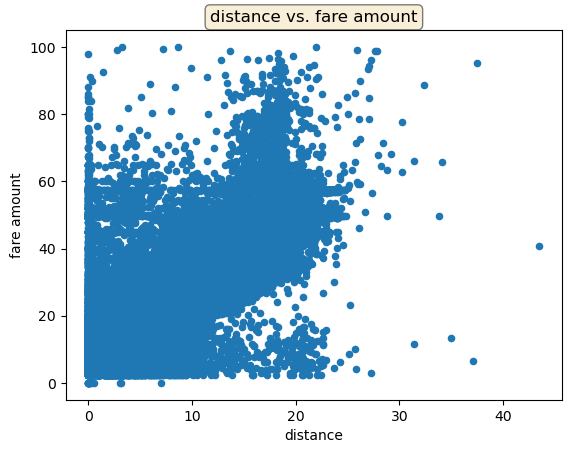

In [12]:
#scatter plots between distances and fare amount for trips that started in New York City
start_in_nyc = trips[trips['start_out_nyc'] == 0]

for feat in ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance']:
    start_in_nyc.plot.scatter(x= feat, y= 'fare_amount').set(xlabel= feat, ylabel= 'fare amount')
    plt.title(f'{feat} vs. fare amount', bbox= dict(boxstyle= 'round', facecolor= 'wheat', alpha= 0.5))
    plt.show()